In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

Starting virtual X frame buffer: Xvfb.
env: DISPLAY=:1


start-stop-daemon: unable to stat /usr/bin/Xvfb (No such file or directory)


### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation space: Box(2,)
Action space: Discrete(3)


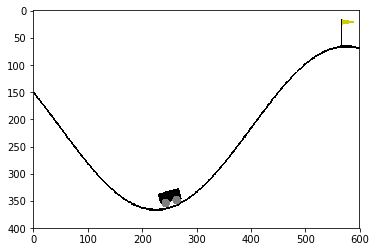

In [2]:
import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [3]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.41574691  0.        ]


In [4]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 2 (right)
new observation code: [-4.15541757e-01  2.05150824e-04]
reward: -1.0
is game over?: False


### Play with it

Below is the code that drives the car to the right. 

However, it doesn't reach the flag at the far right due to gravity. 

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You're not required to build any sophisticated algorithms for now, feel free to hard-code :)

_Hint: your action at each step should depend only on __t__ .

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


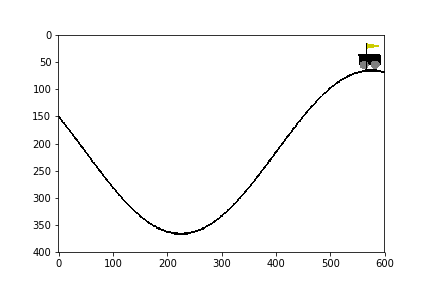

Well done!


In [11]:

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t):
    if t > 60:
        return actions['right']
    elif t > 15:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    s, r, done, _ = env.step(policy(t))
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")

env.close()

### Submit to coursera

In [12]:
from submit import submit_interface
submit_interface(policy, 'email', 'token')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Submitted to Coursera platform. See results on assignment page!
